In [1]:
# storing data files in an array
import os
data_folder_name = 'Kickstarter_2021-03-18T03_20_11_507Z'
data_files = []
for root, dirs, files in os.walk(data_folder_name):
    for file in files:
        data_files.append(os.path.join(root, file))

# sorted based on file names
data_files = sorted(data_files)
data_files

['Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter001.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter002.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter003.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter004.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter005.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter006.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter007.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter008.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter009.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter010.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter011.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter012.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter013.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter014.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kickstarter015.csv',
 'Kickstarter_2021-03-18T03_20_11_507Z/Kick

In [2]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import matplotlib and sns
import matplotlib.pyplot as plt
import seaborn as sns

# LabelEncoder
from sklearn.preprocessing import LabelEncoder


# read all the files at one go
df = pd.concat(pd.read_csv(f) for f in data_files)

# get the info about the dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213583 entries, 0 to 3446
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             213583 non-null  int64  
 1   blurb                     213576 non-null  object 
 2   category                  213583 non-null  object 
 3   converted_pledged_amount  213583 non-null  int64  
 4   country                   213583 non-null  object 
 5   country_displayable_name  213583 non-null  object 
 6   created_at                213583 non-null  int64  
 7   creator                   213583 non-null  object 
 8   currency                  213583 non-null  object 
 9   currency_symbol           213583 non-null  object 
 10  currency_trailing_code    213583 non-null  bool   
 11  current_currency          213583 non-null  object 
 12  deadline                  213583 non-null  int64  
 13  disable_communication     213583 non-null  boo

In [3]:
# drop columns with very few values
# friends, is_backing, is_starred, permissions: all of them has only 96 non-null values.

columns_with_few_values = [
    'friends', 
    'is_backing', 
    'is_starred', 
    'permissions'
]

# drop columns with little useful data
columns_with_not_useful_data = [
    'blurb', # doesn't provide value
    'creator', # doesn't provide value
    'country_displayable_name', # doesn't provide value
    'currency_symbol', # doesn't provide value
    'currency_trailing_code', # doesn't provide value
    'current_currency',# doesn't provide value
    'static_usd_rate', # doesn't provide value
    'fx_rate', # foreign exchange rate: similar to static_usd_rate
    'slug', # similar to blurb
    'profile', # creator's kickstarter profile
    'source_url', # doesn't provide value
    'urls', # doesn't provide value
    'usd_type', # doesn't provide value
    'photo', # doesn't provide value
    'id', # doesn't provide value
    'name', # doesn't provide value: name of the kickstarter project
    'location', # more nuanced location: will be using country instead
    'disable_communication', # all value is same
    'pledged', # will be using converted_pledged_amount
    'usd_pledged', # will be using converted_pledged_amount
    'state_changed_at', # doesn't provide value
]

columns_to_drop = columns_with_few_values + columns_with_not_useful_data

df.drop(columns=columns_to_drop, inplace=True)

df.head()

,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state
0,4,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",41,US,1512430228,USD,1515102534,150.0,False,1512510534,False,False,failed
1,35,"{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",2205,US,1528377129,USD,1531325825,900.0,False,1528733825,True,False,successful
2,310,"{""id"":256,""name"":""Spaces"",""slug"":""dance/spaces...",8861,US,1443014021,USD,1447620375,8500.0,False,1443728775,True,False,successful
3,1,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",100,US,1412436646,USD,1415406440,50000.0,False,1412810840,False,False,failed
4,36,"{""id"":343,""name"":""Candles"",""slug"":""crafts/cand...",1026,US,1599615992,USD,1602385860,800.0,False,1600148240,True,True,successful


In [4]:
# create two new columns: category_name, parent_category_name
# get name from category
df = df.assign(category_name=df['category'].apply(lambda category: eval(category)['name']))
df.head()

,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name
0,4,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",41,US,1512430228,USD,1515102534,150.0,False,1512510534,False,False,failed,DIY
1,35,"{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",2205,US,1528377129,USD,1531325825,900.0,False,1528733825,True,False,successful,Woodworking
2,310,"{""id"":256,""name"":""Spaces"",""slug"":""dance/spaces...",8861,US,1443014021,USD,1447620375,8500.0,False,1443728775,True,False,successful,Spaces
3,1,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",100,US,1412436646,USD,1415406440,50000.0,False,1412810840,False,False,failed,DIY
4,36,"{""id"":343,""name"":""Candles"",""slug"":""crafts/cand...",1026,US,1599615992,USD,1602385860,800.0,False,1600148240,True,True,successful,Candles


In [5]:
# get parent name from category
# sometimes parent_name is omitted, due to the fact that it is the same as category name.

def get_parent_category(category):
    c = eval(category)
    return c.get('parent_name') or c.get('name')

df = df.assign(parent_category_name=df['category'].apply(get_parent_category))
df.head()

,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name
0,4,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",41,US,1512430228,USD,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts
1,35,"{""id"":356,""name"":""Woodworking"",""slug"":""crafts/...",2205,US,1528377129,USD,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts
2,310,"{""id"":256,""name"":""Spaces"",""slug"":""dance/spaces...",8861,US,1443014021,USD,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance
3,1,"{""id"":345,""name"":""DIY"",""slug"":""crafts/diy"",""po...",100,US,1412436646,USD,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts
4,36,"{""id"":343,""name"":""Candles"",""slug"":""crafts/cand...",1026,US,1599615992,USD,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts


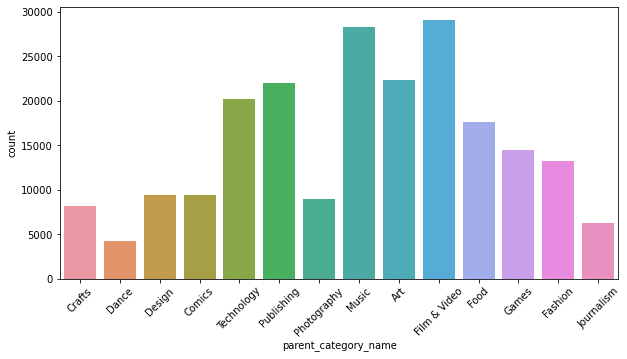

In [6]:
# plot the parent_category_name to get an idea of the distribution
plt.figure(figsize=(10,5))
s = sns.countplot(x=df['parent_category_name'])
s.set_xticklabels(s.get_xticklabels(), rotation=45)
plt.show()

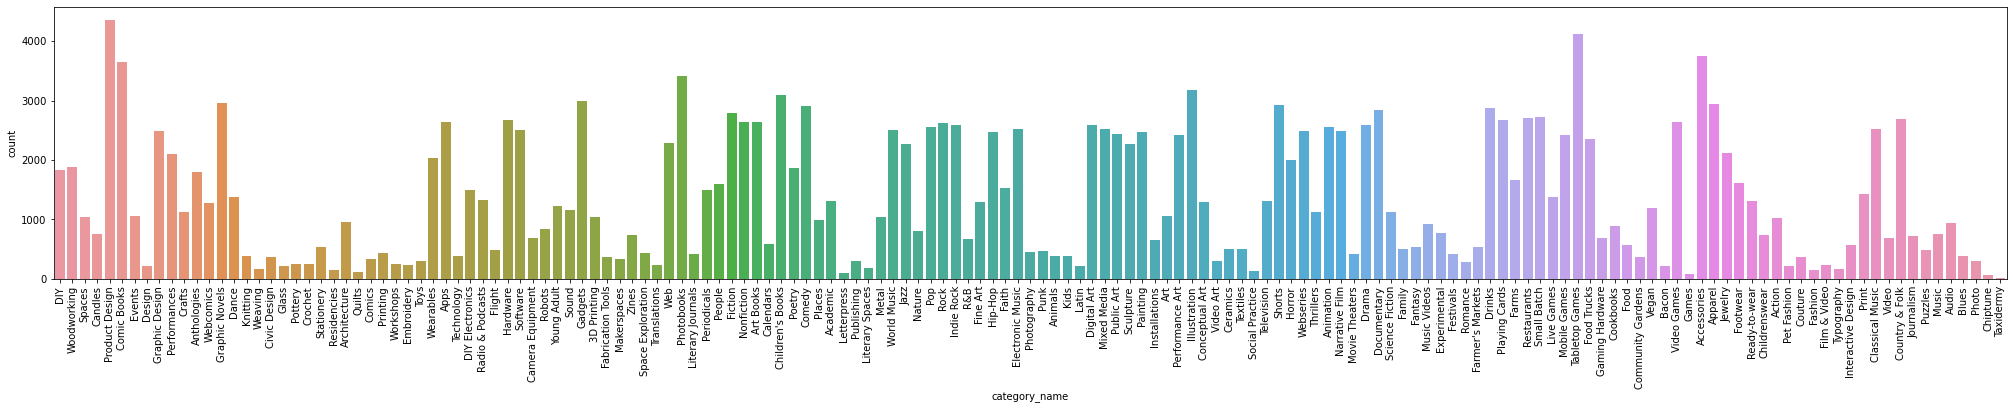

In [7]:
# plot the category_name to get an idea of the distribution
plt.figure(figsize=(35,5))
s = sns.countplot(x=df['category_name'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [8]:
# now we can drop category object column
df.drop(columns=['category'], inplace=True)
df.head()

,backers_count,converted_pledged_amount,country,created_at,currency,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name
0,4,41,US,1512430228,USD,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts
1,35,2205,US,1528377129,USD,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts
2,310,8861,US,1443014021,USD,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance
3,1,100,US,1412436646,USD,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts
4,36,1026,US,1599615992,USD,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts


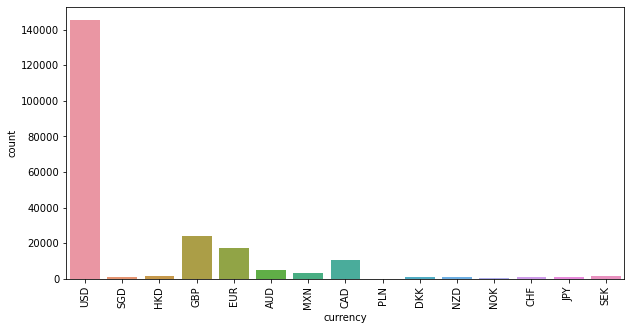

In [9]:
# plot the category_name to get an idea of the distribution
plt.figure(figsize=(10,5))
s = sns.countplot(x=df['currency'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

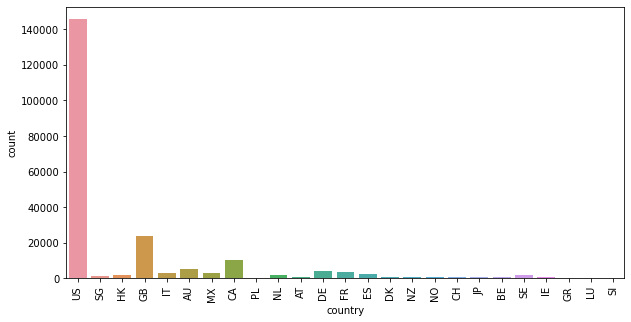

In [10]:
# plot the category_name to get an idea of the distribution
plt.figure(figsize=(10,5))
s = sns.countplot(x=df['country'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [11]:
# other than US and USD, no other values for country and currency has significant sample size
# will drop this two columns since this will provide little value

df.drop(columns=['country', 'currency'], inplace=True)
df.head()

,backers_count,converted_pledged_amount,created_at,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name
0,4,41,1512430228,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts
1,35,2205,1528377129,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts
2,310,8861,1443014021,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance
3,1,100,1412436646,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts
4,36,1026,1599615992,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts


In [12]:
# create synthetic column project_duration_day
sec_per_day = 86400

# project_duration_day = (deadline - created_at) / (86400)
df['project_duration'] = (df['deadline'] - df['created_at']) / sec_per_day
df['project_duration'] = df['project_duration'].apply(np.ceil)
df.head()

,backers_count,converted_pledged_amount,created_at,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name,project_duration
0,4,41,1512430228,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts,31.0
1,35,2205,1528377129,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts,35.0
2,310,8861,1443014021,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance,54.0
3,1,100,1412436646,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts,35.0
4,36,1026,1599615992,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts,33.0


In [13]:
# launch_delay_day = (launched_at - created_at) / (86400)
df['launch_delay_day'] = (df['launched_at'] - df['created_at']) / sec_per_day
df['launch_delay_day'] = df['launch_delay_day'].apply(np.ceil)
df.head()

,backers_count,converted_pledged_amount,created_at,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day
0,4,41,1512430228,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts,31.0,1.0
1,35,2205,1528377129,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts,35.0,5.0
2,310,8861,1443014021,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance,54.0,9.0
3,1,100,1412436646,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts,35.0,5.0
4,36,1026,1599615992,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts,33.0,7.0


In [14]:
# per_day_usd_req = goal / project_duration
df['per_day_usd_req'] = df['goal'] / df['project_duration']
df.head()

,backers_count,converted_pledged_amount,created_at,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req
0,4,41,1512430228,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts,31.0,1.0,4.838710
1,35,2205,1528377129,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts,35.0,5.0,25.714286
2,310,8861,1443014021,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance,54.0,9.0,157.407407
3,1,100,1412436646,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts,35.0,5.0,1428.571429
4,36,1026,1599615992,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts,33.0,7.0,24.242424


In [15]:
# per_day_usd_pledged = converted_pledged_amount / project_duration
df['per_day_usd_pledged'] = df['converted_pledged_amount'] / df['project_duration']
df.head()

,backers_count,converted_pledged_amount,created_at,deadline,goal,is_starrable,launched_at,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged
0,4,41,1512430228,1515102534,150.0,False,1512510534,False,False,failed,DIY,Crafts,31.0,1.0,4.838710,1.322581
1,35,2205,1528377129,1531325825,900.0,False,1528733825,True,False,successful,Woodworking,Crafts,35.0,5.0,25.714286,63.000000
2,310,8861,1443014021,1447620375,8500.0,False,1443728775,True,False,successful,Spaces,Dance,54.0,9.0,157.407407,164.092593
3,1,100,1412436646,1415406440,50000.0,False,1412810840,False,False,failed,DIY,Crafts,35.0,5.0,1428.571429,2.857143
4,36,1026,1599615992,1602385860,800.0,False,1600148240,True,True,successful,Candles,Crafts,33.0,7.0,24.242424,31.090909


In [16]:
# now we can remove deadline, created_at, launched columns
df.drop(columns=['deadline', 'created_at', 'launched_at'], inplace=True)
df.head()

,backers_count,converted_pledged_amount,goal,is_starrable,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged
0,4,41,150.0,False,False,False,failed,DIY,Crafts,31.0,1.0,4.838710,1.322581
1,35,2205,900.0,False,True,False,successful,Woodworking,Crafts,35.0,5.0,25.714286,63.000000
2,310,8861,8500.0,False,True,False,successful,Spaces,Dance,54.0,9.0,157.407407,164.092593
3,1,100,50000.0,False,False,False,failed,DIY,Crafts,35.0,5.0,1428.571429,2.857143
4,36,1026,800.0,False,True,True,successful,Candles,Crafts,33.0,7.0,24.242424,31.090909


In [17]:
# This is to show how % of different state distributes across different dimension
# Change first parameter

# crosst = pd.crosstab(df['staff_pick'],df['state'])
# crosst['% of succ. projects'] = crosst['successful']/crosst.sum(axis=1)
# crosst['% of fail. projects'] = crosst['failed']/crosst.sum(axis=1)
# crosst['% of canceled. projects'] = crosst['canceled']/crosst.sum(axis=1)
# crosst['% of live. projects'] = crosst['live']/crosst.sum(axis=1)
# crosst.sort_values(by=['% of succ. projects'],inplace=True,ascending=False)
# crosst

In [18]:
# Apply Label Encoder to category_name and parent_category_name
# so that these two columns can be transformed into a numerical column instead of textual column

# convert category_name to category numeric value
encoder_category= LabelEncoder().fit(df['category_name'])
df['category'] = encoder_category.transform(df['category_name'])

df.head()

,backers_count,converted_pledged_amount,goal,is_starrable,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged,category
0,4,41,150.0,False,False,False,failed,DIY,Crafts,31.0,1.0,4.838710,1.322581,34
1,35,2205,900.0,False,True,False,successful,Woodworking,Crafts,35.0,5.0,25.714286,63.000000,152
2,310,8861,8500.0,False,True,False,successful,Spaces,Dance,54.0,9.0,157.407407,164.092593,132
3,1,100,50000.0,False,False,False,failed,DIY,Crafts,35.0,5.0,1428.571429,2.857143,34
4,36,1026,800.0,False,True,True,successful,Candles,Crafts,33.0,7.0,24.242424,31.090909,17


In [19]:
# convert parent_category_name into parent_category numeric
encoder_main_category= LabelEncoder().fit(df['parent_category_name'])
df['parent_category'] = encoder_main_category.transform(df['parent_category_name'])

df.head()

,backers_count,converted_pledged_amount,goal,is_starrable,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged,category,parent_category
0,4,41,150.0,False,False,False,failed,DIY,Crafts,31.0,1.0,4.838710,1.322581,34,2
1,35,2205,900.0,False,True,False,successful,Woodworking,Crafts,35.0,5.0,25.714286,63.000000,152,2
2,310,8861,8500.0,False,True,False,successful,Spaces,Dance,54.0,9.0,157.407407,164.092593,132,3
3,1,100,50000.0,False,False,False,failed,DIY,Crafts,35.0,5.0,1428.571429,2.857143,34,2
4,36,1026,800.0,False,True,True,successful,Candles,Crafts,33.0,7.0,24.242424,31.090909,17,2


In [20]:
# convert state to numeric
encoder_state = LabelEncoder().fit(df['state'])
df['state'] = encoder_state.transform(df['state'])

df.head()

,backers_count,converted_pledged_amount,goal,is_starrable,spotlight,staff_pick,state,category_name,parent_category_name,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged,category,parent_category
0,4,41,150.0,False,False,False,1,DIY,Crafts,31.0,1.0,4.838710,1.322581,34,2
1,35,2205,900.0,False,True,False,3,Woodworking,Crafts,35.0,5.0,25.714286,63.000000,152,2
2,310,8861,8500.0,False,True,False,3,Spaces,Dance,54.0,9.0,157.407407,164.092593,132,3
3,1,100,50000.0,False,False,False,1,DIY,Crafts,35.0,5.0,1428.571429,2.857143,34,2
4,36,1026,800.0,False,True,True,3,Candles,Crafts,33.0,7.0,24.242424,31.090909,17,2


In [21]:
# drop textual category_name and parent_category_name
df.drop(columns=['category_name', 'parent_category_name'], inplace=True)
df.head()

,backers_count,converted_pledged_amount,goal,is_starrable,spotlight,staff_pick,state,project_duration,launch_delay_day,per_day_usd_req,per_day_usd_pledged,category,parent_category
0,4,41,150.0,False,False,False,1,31.0,1.0,4.838710,1.322581,34,2
1,35,2205,900.0,False,True,False,3,35.0,5.0,25.714286,63.000000,152,2
2,310,8861,8500.0,False,True,False,3,54.0,9.0,157.407407,164.092593,132,3
3,1,100,50000.0,False,False,False,1,35.0,5.0,1428.571429,2.857143,34,2
4,36,1026,800.0,False,True,True,3,33.0,7.0,24.242424,31.090909,17,2


In [22]:
y = df['state']
df.drop(labels=["state"], axis=1, inplace=True)

In [23]:
y

0       1
1       3
2       3
3       1
4       3
       ..
3442    3
3443    1
3444    3
3445    1
3446    1
Name: state, Length: 213583, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

# Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=10)
print('training X shape: ' + str(X_train.shape))
print('test X shape: ' + str(X_test.shape))
print('train y shape: '+ str(y_train.shape))
print('test y shape: ' + str(y_test.shape))

training X shape: (149508, 12)
test X shape: (64075, 12)
train y shape: (149508,)
test y shape: 2865    3
2148    2
1902    1
2654    3
1095    3
       ..
729     0
2564    1
2136    1
1392    3
2831    1
Name: state, Length: 64075, dtype: int64


In [35]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=0).fit(X_train , y_train)
print('Accuracy of the training model:'+" "+str(DT.score(X_train, y_train)))

y_predict = DT.predict(X_test)
print('Accuracy of the model:'+" "+str(accuracy_score(y_true=y_test, y_pred=y_predict)))

Accuracy of the training model: 0.9988027396527276
Accuracy of the model: 0.928458837300039
